In [55]:
import numpy as np
import scipy.stats as ss
import elfi
import matplotlib.pyplot as plt
import os
import sys
sys.path.append(os.path.abspath(os.path.join('..')))
import pyabc
from pyabc.examples import clinic
from pyabc.utils import plot_marginals

# Clinic Example
![](img/clinic.png)

In [56]:
simulator = clinic.simulator

In [57]:
# Set the generating parameters that we will try to infer
lambda0 = 1/10

# Generate some dat9 (using a fixed seed here)
np.random.seed(1228)
y0 = simulator(lambda0)
print(y0)

[[49], array([  0.        ,   0.        ,   0.        ,   0.        ,
         0.42344354,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   4.51585521,   0.        ,
         4.34929369,   5.33611555,   4.79045358,  11.19269357,
        10.47966238,   6.52416327,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   5.97595535,   8.83547883,
         0.        ,   0.        ,   0.        ,   0.29101362,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,   0.        ]), [964.8378133280579]]


In [58]:
closing_time, nr_patients, nr_waiting_patients = clinic.summaries

In [59]:
# prior over rate parameter
rate = pyabc.Prior('uniform', 0.01,1, name='rate')
rate.name

'rate'

# Our PYABC

In [62]:
rej = pyabc.RejectionSampler(priors=[rate], simulator=simulator, 
                             summaries=[closing_time, nr_patients, nr_waiting_patients],
                             observation=y0)

In [63]:
rej.sample(nr_samples=100000, threshold=0.01)

Rejection sampler started with threshold: 0.01 and number of samples: 100000
Samples: 100000 - Threshold: 0.01 - Iterations:    2750000 - Acceptance rate: 0.036364 - Time:  3495.12 s


In [65]:
smc = pyabc.SMCSampler(priors=[rate], simulator=simulator, 
                             summaries=[closing_time, nr_patients, nr_waiting_patients],
                             observation=y0)

In [66]:
smc.sample(nr_samples=100000, thresholds=[0.1, 0.05, 0.01])

SMC sampler started with thresholds: [0.1, 0.05, 0.01] and number of samples: 100000
Rejection sampler started with threshold: 0.1 and number of samples: 100000
Iteration 0 completed
starting iteration[ 1 ]
Iteration 1 completed
starting iteration[ 2 ]
Iteration 2 completed
Samples: 100000 - Thresholds: 0.01 - Iterations:    1207260 - Acceptance rate: 0.082832 - Time:  2218.76 s


In [67]:
mcmc = pyabc.MCMCSampler(priors=[rate], simulator=simulator, 
                             summaries=[closing_time, nr_patients, nr_waiting_patients],
                             observation=y0)

In [68]:
mcmc.sample(nr_samples=100000, threshold = 0.01, step_size = [0.005])

MCMC sampler started with threshold: 0.01 and number of samples: 100000
Rejection sampler started with threshold: 0.01 and number of samples: 1
Samples: 100000 - Threshold: 0.01 - Iterations:         40 - Acceptance rate: 2500.000000 - Time:   146.52 s


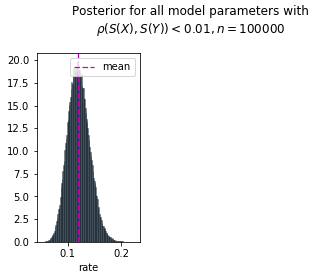

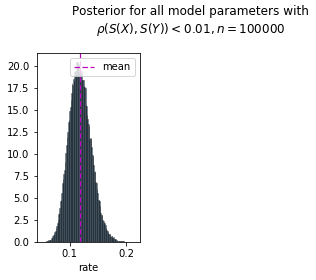

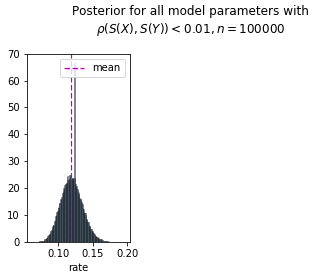

In [69]:
plot_marginals(rej)
plot_marginals(smc)
plot_marginals(mcmc)

In [ ]:
mcmc.Thetas